Importing data Part 1

In [54]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/jepey/OneDrive/Documents/COMP309/Ass4-data/Part 1 - regression/diamonds.csv', sep=',', header=0)
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


Initially I can see that the first column would probably need to be dropped seeing as it is an ID. Also there are 3 categorical features one of which being cut I can definately tell is ordinal so OrdinalEncoder may be necessary in preprocessing. Through some research color and clairty are also Ordinal as there is a ranking from best to works colors and clarity eg D to Z for color. The target variable is price which is the last column and this should be kept separate to the other data. XYZ seems to be the size of the diamond and also are very similar values for each instance.

In [55]:
print("Correlations to price")
df[df.columns[:]].corr()['price'][:]

Correlations to price


Unnamed: 0   -0.306873
carat         0.921591
depth        -0.010647
table         0.127134
x             0.884435
y             0.865421
z             0.861249
price         1.000000
Name: price, dtype: float64

Carat has the highest correlation to the target varaible price with 0.92. XYZ features also have very similar and high correlations with around 0.87. Depth and unnamed features both have negative low correlation to price so may be worth dropping in preprocessing. The categorical features are not represented above as need to be encoded.

In [56]:
print("NA Missing Values")
df.isnull().sum()

NA Missing Values


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

There seems to be no NA missing values which means there is probably no need to impute missing values unless there are non NA missing values

In [53]:
print("0 Missing Values")
print(df.isin([0]).sum(axis=0))

0 Missing Values
Unnamed: 0     0
carat          0
cut            0
color          0
clarity        0
depth          0
table          0
x              8
y              7
z             20
price          0
dtype: int64


This shows there are some 0 missing values to be removed

In [32]:
print("No. unique values")
df.nunique()

No. unique values


Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
x               554
y               552
z               375
price         11602
dtype: int64

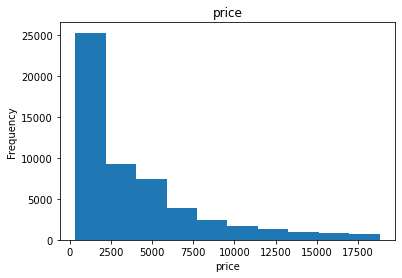

Skew:
1.6183502776053016
Kurtosis:
2.177382669056634


In [15]:
from scipy.stats import skew
from scipy.stats import kurtosis
sale = df.loc[:,"price"]
sale.plot.hist(bins=10)
plt.title("price")
plt.xlabel("price")
plt.show()

print("Skew:")
print(skew(sale))

print("Kurtosis:")
print(kurtosis(sale))

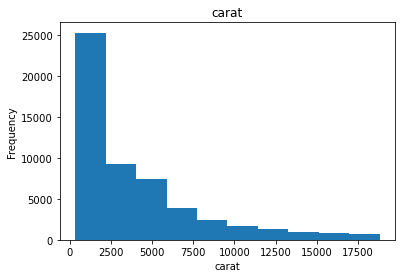

Skew:
1.1166148681277797
Kurtosis:
1.2564076184374766


In [16]:
carat = df.loc[:,"carat"]
sale.plot.hist(bins=10)
plt.title("carat")
plt.xlabel("carat")
plt.show()

print("Skew:")
print(skew(carat))

print("Kurtosis:")
print(kurtosis(carat))

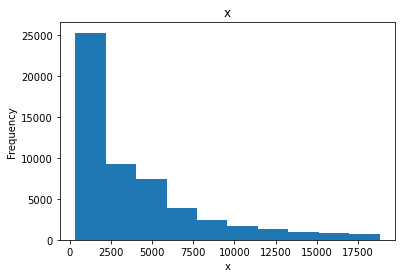

Skew:
0.3786658120772097
Kurtosis:
-0.6182146042773282


In [17]:
x = df.loc[:,"x"]
sale.plot.hist(bins=10)
plt.title("x")
plt.xlabel("x")
plt.show()

print("Skew:")
print(skew(x))

print("Kurtosis:")
print(kurtosis(x))

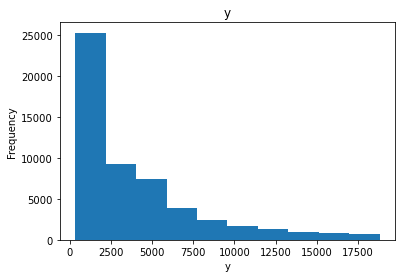

Skew:
2.4340990250113648
Kurtosis:
91.20599095863467


In [20]:
y = df.loc[:,"y"]
sale.plot.hist(bins=10)
plt.title("y")
plt.xlabel("y")
plt.show()

print("Skew:")
print(skew(y))

print("Kurtosis:")
print(kurtosis(y))

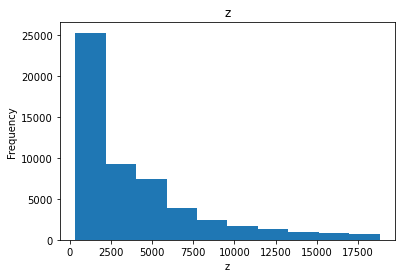

Skew:
1.5223802221853722
Kurtosis:
47.08214348390816


In [21]:
z = df.loc[:,"z"]
sale.plot.hist(bins=10)
plt.title("z")
plt.xlabel("z")
plt.show()

print("Skew:")
print(skew(z))

print("Kurtosis:")
print(kurtosis(z))

All graphs had a strong skewness to the right as there are more lower values which due to the higher correlation can mean lower price. Therefore there are not many high value diamonds in the dataset which may make it hard for the regression model as majority of the diamonds are on the cheaper end. Y and Z both have very high kurotsis at 91 for Y and 47 for Z this means that the data has a very high peak and heavy edges as seen with the skewness. Carat is relatively normally distributed. The data should also be scaled in preprocessing to accomodate for outliers

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import train_test_split
df = pd.read_csv('C:/Users/jepey/OneDrive/Documents/COMP309/Ass4-data/Part 1 - regression/diamonds.csv', sep=',', header=0)
df = df.drop(columns="Unnamed: 0")
df = df.replace(0, np.nan)
df = df.dropna()
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size=0.3, random_state=309)



numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)


ordinal_columns = ['cut','color','clarity']
df = pd.DataFrame(Xtrain)
ordLabel = [
["Fair","Good","Very Good","Premium","Ideal"],
['J','I','H','G','F','E','D'],
['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
]
enc = OrdinalEncoder(categories=ordLabel)
enc.fit(df[['cut','color','clarity']])
df[ordinal_columns] = enc.transform(df[ordinal_columns])


numerical_columns = numerical_columns_selector(Xtrain)
print(numerical_columns)
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('standard_scaler', numerical_preprocessor, numerical_columns)])
preprocessor.fit(df)
dfTrainX = pd.DataFrame(preprocessor.transform(df),columns=preprocessor.get_feature_names_out())
Ytrain = pd.DataFrame(Ytrain)
dfTrainX

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']


,standard_scaler__carat,standard_scaler__cut,standard_scaler__color,standard_scaler__clarity,standard_scaler__depth,standard_scaler__table,standard_scaler__x,standard_scaler__y,standard_scaler__z
0,0.216216,1.00,0.166667,0.428571,0.538889,0.269231,0.440799,0.058312,0.104458
1,0.074844,0.75,0.666667,0.285714,0.547222,0.307692,0.219686,0.027888,0.072242
2,0.074844,0.50,0.500000,0.571429,0.486111,0.307692,0.218260,0.029518,0.069313
3,0.247401,0.75,0.666667,0.285714,0.530556,0.288462,0.489301,0.061934,0.109339
4,0.064449,0.25,0.500000,0.714286,0.558333,0.288462,0.191155,0.025896,0.069639
...,...,...,...,...,...,...,...,...,...
37739,0.024948,1.00,0.666667,0.428571,0.508333,0.269231,0.095578,0.012495,0.052717
37740,0.207900,0.25,0.000000,0.428571,0.591667,0.250000,0.416548,0.052336,0.103482
37741,0.145530,0.25,1.000000,0.285714,0.572222,0.384615,0.328103,0.043281,0.090465
37742,0.064449,0.75,0.833333,0.428571,0.450000,0.288462,0.219686,0.028070,0.066385


In [61]:
ordinal_columns = ['cut','color','clarity']

dfTest = pd.DataFrame(Xtest)

dfTest[ordinal_columns] = enc.transform(dfTest[ordinal_columns])

dfTestX = pd.DataFrame(preprocessor.transform(dfTest),columns=preprocessor.get_feature_names_out())
Ytest = pd.DataFrame(Ytest)
dfTestX

,standard_scaler__carat,standard_scaler__cut,standard_scaler__color,standard_scaler__clarity,standard_scaler__depth,standard_scaler__table,standard_scaler__x,standard_scaler__y,standard_scaler__z
0,0.176715,1.00,0.333333,0.285714,0.511111,0.269231,0.393723,0.051793,0.095347
1,0.103950,1.00,0.500000,0.142857,0.552778,0.250000,0.279601,0.035857,0.081354
2,0.033264,1.00,1.000000,0.714286,0.516667,0.269231,0.118402,0.016480,0.056948
3,0.124740,1.00,0.833333,0.142857,0.497222,0.269231,0.323823,0.042557,0.084282
4,0.478170,0.75,0.166667,0.142857,0.444444,0.326923,0.717546,0.094350,0.134722
...,...,...,...,...,...,...,...,...,...
16171,0.024948,1.00,0.666667,0.428571,0.502778,0.269231,0.101284,0.014306,0.053693
16172,0.024948,1.00,0.666667,1.000000,0.505556,0.269231,0.101284,0.013944,0.053693
16173,0.083160,0.75,0.833333,0.428571,0.469444,0.346154,0.256776,0.032597,0.072568
16174,0.272349,0.50,0.833333,0.285714,0.569444,0.269231,0.506419,0.064288,0.115197


In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 
fs = SelectKBest(score_func=f_regression,k=9) #Finds the best features
fs.fit(dfTrainX,Ytrain)
Xdd = fs.transform(dfTestX)
dataFrame = pd.DataFrame(Xdd, columns=fs.get_feature_names_out(dfTrainX.columns))
dataFrame.columns

C:\Users\jepey\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['standard_scaler__carat', 'standard_scaler__cut',
       'standard_scaler__color', 'standard_scaler__clarity',
       'standard_scaler__depth', 'standard_scaler__table',
       'standard_scaler__x', 'standard_scaler__y', 'standard_scaler__z'],
      dtype='object')

In [64]:
def rse(t,y):
    num = np.sum((t-y)**2)
    den = np.sum((t-np.mean(t))**2)
    return num/den

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import random
random.seed(309)
import time
start_time = time.time()
reg = LinearRegression().fit(dfTrainX,Ytrain)
yPredict = reg.predict(dfTestX)
#score = reg.score(X_testfs,y_test)
mseLin = mean_squared_error(yPredict,Ytest)
rmseLin = sqrt(mseLin)
maeLin = mean_absolute_error(yPredict,Ytest)
timeLin = time.time() - start_time
rseLin = rse(Ytest,yPredict)

C:\Users\jepey\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [66]:
from sklearn.neighbors import KNeighborsRegressor
start_time = time.time()
reg = KNeighborsRegressor().fit(dfTrainX,Ytrain)
yPredict = reg.predict(dfTestX)
#score = reg.score(X_testfs,y_test)
mseKN = mean_squared_error(yPredict,Ytest)
rmseKN = sqrt(mseKN)
maeKN = mean_absolute_error(yPredict,Ytest)
timeKN = time.time() - start_time
rseKN = rse(Ytest,yPredict)

C:\Users\jepey\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [67]:
from sklearn.linear_model import Ridge
start_time = time.time()
reg = Ridge().fit(dfTrainX,Ytrain)
yPredict = reg.predict(dfTestX)
#score = reg.score(X_testfs,y_test)
mseRid = mean_squared_error(yPredict,Ytest)
rmseRid = sqrt(mseRid)
maeRid = mean_absolute_error(yPredict,Ytest)
timeRid = time.time() - start_time
rseRid = rse(Ytest,yPredict)

C:\Users\jepey\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [69]:
from sklearn.tree import DecisionTreeRegressor
start_time = time.time()
reg = DecisionTreeRegressor().fit(dfTrainX,Ytrain)
yPredict = reg.predict(dfTestX)
#score = reg.score(X_testfs,y_test)
mseDTR = mean_squared_error(yPredict,Ytest)
rmseDTR = sqrt(mseDTR)
maeDTR = mean_absolute_error(yPredict,Ytest)
timeDTR = time.time() - start_time
yPredict = yPredict.reshape(16176,1)
rseDTR = rse(Ytest,yPredict)

C:\Users\jepey\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [70]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()
reg = RandomForestRegressor().fit(dfTrainX,Ytrain)
yPredict = reg.predict(dfTestX)
#score = reg.score(X_testfs,y_test)
mseRFR = mean_squared_error(yPredict,Ytest)
rmseRFR = sqrt(mseRFR)
maeRFR = mean_absolute_error(yPredict,Ytest)
timeRFR = time.time() - start_time
yPredict = yPredict.reshape(16176,1)
rseRFR = rse(Ytest,yPredict)

C:\Users\jepey\AppData\Local\Temp\ipykernel_7552\1026025112.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg = RandomForestRegressor().fit(dfTrainX,Ytrain)
C:\Users\jepey\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [71]:
from sklearn.ensemble import GradientBoostingRegressor
start_time = time.time()
reg = GradientBoostingRegressor().fit(dfTrainX,Ytrain)
yPredict = reg.predict(dfTestX)
#score = reg.score(X_testfs,y_test)
mseGBR = mean_squared_error(yPredict,Ytest)
rmseGBR = sqrt(mseGBR)
maeGBR = mean_absolute_error(yPredict,Ytest)
timeGBR = time.time() - start_time
yPredict = yPredict.reshape(16176,1)
rseGBR = rse(Ytest,yPredict)

C:\Users\jepey\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jepey\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [72]:
from sklearn.linear_model import SGDRegressor
start_time = time.time()
reg = SGDRegressor().fit(dfTrainX,Ytrain)
yPredict = reg.predict(dfTestX)
#score = reg.score(X_testfs,y_test)
mseSGD= mean_squared_error(yPredict,Ytest)
rmseSGD = sqrt(mseSGD)
maeSGD = mean_absolute_error(yPredict,Ytest)
timeSGD = time.time() - start_time
yPredict = yPredict.reshape(16176,1)
rseSGD = rse(Ytest,yPredict)

C:\Users\jepey\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jepey\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [73]:
from sklearn.svm import SVR
start_time = time.time()
reg = SVR().fit(dfTrainX,Ytrain)
yPredict = reg.predict(dfTestX)
#score = reg.score(X_testfs,y_test)
mseSVR= mean_squared_error(yPredict,Ytest)
rmseSVR = sqrt(mseSVR)
maeSVR = mean_absolute_error(yPredict,Ytest)
timeSVR = time.time() - start_time
yPredict = yPredict.reshape(16176,1)
rseSVR = rse(Ytest,yPredict)

C:\Users\jepey\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jepey\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [74]:
from sklearn.svm import LinearSVR
start_time = time.time()
reg = LinearSVR().fit(dfTrainX,Ytrain)
yPredict = reg.predict(dfTestX)
#score = reg.score(X_testfs,y_test)
mseLSVR= mean_squared_error(yPredict,Ytest)
rmseLSVR = sqrt(mseLSVR)
maeLSVR = mean_absolute_error(yPredict,Ytest)
timeLSVR = time.time() - start_time
yPredict = yPredict.reshape(16176,1)
rseLSVR = rse(Ytest,yPredict)

C:\Users\jepey\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jepey\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [10]:
rseLSVR

price    0.840504
dtype: float64

In [75]:
from sklearn.neural_network import MLPRegressor
start_time = time.time()
reg = MLPRegressor().fit(dfTrainX,Ytrain)
yPredict = reg.predict(dfTestX)
#score = reg.score(X_testfs,y_test)
mseMLP= mean_squared_error(yPredict,Ytest)
rmseMLP = sqrt(mseMLP)
maeMLP = mean_absolute_error(yPredict,Ytest)
timeMLP = time.time() - start_time
yPredict = yPredict.reshape(16176,1)
rseMLP = rse(Ytest,yPredict)

C:\Users\jepey\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jepey\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jepey\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [76]:
from tabulate import tabulate
tableReg = [
    ["Linear Regression",mseLin,rmseLin,maeLin,timeLin,rseLin],
    ["KNeighbors Regressor",mseKN,rmseKN,maeKN,timeKN,rseKN],
    ["Ridge Regressor",mseRid,rmseRid,maeRid,timeRid,rseRid],
    ["Decision Tree Regressor",mseDTR,rmseDTR,maeDTR,timeDTR,rseDTR],
    ["Random Forest Regressor",mseRFR,rmseRFR,maeRFR,timeRFR,rseRFR],
    ["Gradient Boosting Regressor",mseGBR,rmseGBR,maeGBR,timeGBR,rseGBR],
    ["SGD Regressor",mseSGD,rmseSGD,maeSGD,timeSGD,rseSGD],
    ["SVR",mseSVR,rmseSVR,maeSVR,timeSVR,rseSVR],
    ["Linear SVR",mseLSVR,rmseLSVR,maeLSVR,timeLSVR,rseLSVR],
    ["MLP Regressor",mseMLP,rmseMLP,maeMLP,timeMLP,rseMLP]
]
head = ["Regressor","MSE","RMSE","MAE","TimeTaken","RSE"]

print(tabulate(tableReg, headers=head, tablefmt="grid",floatfmt=".2f"))

+-----------------------------+-------------+---------+---------+-------------+-------+
| Regressor                   |         MSE |    RMSE |     MAE |   TimeTaken |   RSE |
+=============================+=============+=========+=========+=============+=======+
| Linear Regression           |  1435162.52 | 1197.98 |  802.95 |        0.03 |  0.09 |
+-----------------------------+-------------+---------+---------+-------------+-------+
| KNeighbors Regressor        |   504526.34 |  710.30 |  360.64 |        0.51 |  0.03 |
+-----------------------------+-------------+---------+---------+-------------+-------+
| Ridge Regressor             |  1452993.84 | 1205.40 |  816.44 |        0.05 |  0.09 |
+-----------------------------+-------------+---------+---------+-------------+-------+
| Decision Tree Regressor     |   551481.75 |  742.62 |  361.92 |        0.35 |  0.03 |
+-----------------------------+-------------+---------+---------+-------------+-------+
| Random Forest Regressor     | 

Part 2

Loading Training Dataset

In [5]:
df2 = pd.read_csv('C:/Users/jepey/OneDrive/Documents/COMP309/Ass4-data/Part 2 - classification/adult.data', sep=',', header=0,names=["age", "workclass", "fnlwgt", "education","educational-num","marital-status",'occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income'])
#df2.to_csv("C:/Users/jepey/OneDrive/Documents/COMP309/Ass4-data/Training.csv")

In [6]:
df2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df2.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


There seems to be 8 categorical features and 6 numerical. 
The first categorical is workclass which can be either Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. This describes their work category and should be encoded using One Hot Encoder. 
Next is education which includes Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. This describes their highest education. This category seems to be ordinal as is a ranking so can use ordinal encoder on it.
Next is Marital Status which can be Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse and should be encoded using One Hot Encoder.
Next is occupation which has a few options showing the persons occupation and should be encoded using One Hot Encoder.
Relationship describes the persons relation in a family and can include Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried and should be encoded using One Hot Encoder.
Race has 5 categories being White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black and should be encoded using One Hot Encoder.
And Sex has 2 options male or female. This can be binary encoded.
Native country has a bunch of options also which would benefit from One Hot Encoding.

The numerical feaures have a large range of possible values so should be scaled using a scaler in preprocessing.


Text(0.5, 1.0, 'Correlation Heatmap')

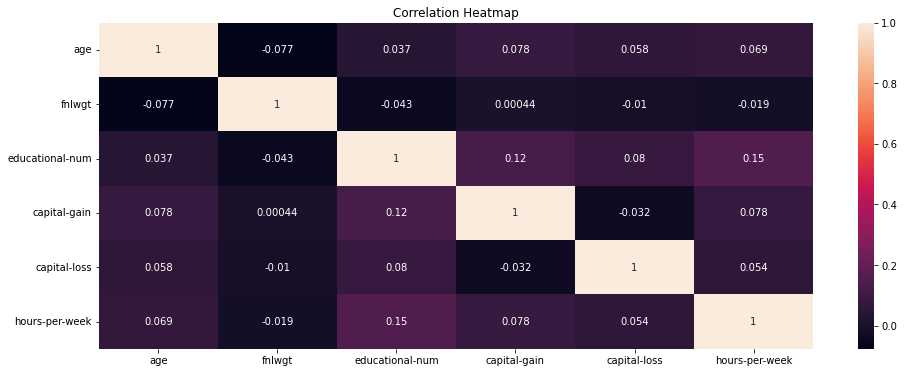

In [93]:
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df2.corr(),annot=True)
heatmap.set_title('Correlation Heatmap')

There seems to be very low correlations between numerical features which means none of the features are correlated enough to be dropped

In [38]:
print("NA missing values")
df2.isnull().sum()

NA missing values


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

There are no NA missing values however with further analysis there seems to be non NA missing values in the form of ? which should be encoded using an imputer

In [39]:
print("? Missing Values")
print(df2.isin([' ?']).sum(axis=0))

? Missing Values
age                   0
workclass          1836
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1843
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income                0
dtype: int64


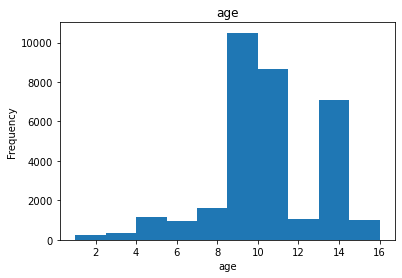

Skew:
0.5587118988154982
Kurtosis:
-0.16637097336607676


In [17]:
from scipy.stats import skew
from scipy.stats import kurtosis
eduNum = df2.loc[:,"educational-num"]
eduNum.plot.hist()
plt.title("age")
plt.xlabel("age")
plt.show()

print("Skew:")
print(skew(sale))

print("Kurtosis:")
print(kurtosis(sale))

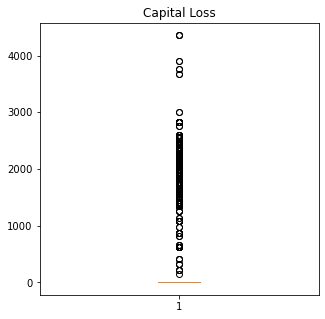

In [48]:
plt.rcParams["figure.figsize"] = (5,5)
age = df2.loc[:,"age"]
eduNum = df2.loc[:,"educational-num"]
fnl = df2.loc[:,"fnlwgt"]
cap = df2.loc[:,"capital-gain"]
capL = df2.loc[:,"capital-loss"]
hours = df2.loc[:,"hours-per-week"]
plt.boxplot(capL)
plt.title("Capital Loss")
plt.show()


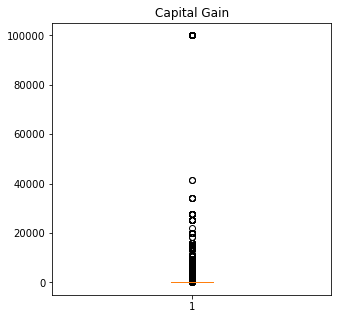

In [49]:
plt.boxplot(cap)
plt.title("Capital Gain")
plt.show()

In [39]:
print("No. unique values in Training")
df2.nunique()

No. unique values in Training


age                   73
workclass              9
fnlwgt             21647
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         119
capital-loss          92
hours-per-week        94
native-country        42
income                 2
dtype: int64

Histogram of Target Varaible Income


<AxesSubplot:>

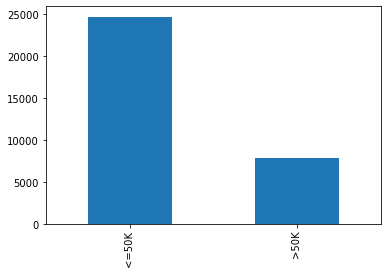

In [40]:
print("Histogram of Target Varaible Income")
df2['income'].value_counts().plot(kind='bar')

From above we can see the data is scewed towards the less than 50k as there is almost 3 times the amount of recordings in the training set for <50k than >50k

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
df2 = pd.read_csv('C:/Users/jepey/OneDrive/Documents/COMP309/Ass4-data/training.csv', sep=',', header=0)

df2 = df2.drop(columns="Unnamed: 0")
df2 = df2.replace(" ?", np.nan)
work_imputer = SimpleImputer(strategy = "most_frequent")
occupation_imputer = SimpleImputer(strategy = "most_frequent")
native_imputer = SimpleImputer(strategy = "most_frequent")

occupation_imputer.fit(df2[['occupation']])
df2[['occupation']] = occupation_imputer.transform(df2[['occupation']])
work_imputer.fit(df2[['workclass']])
df2['workclass'] = work_imputer.transform(df2[['workclass']])
native_imputer.fit(df2[['native-country']])
df2['native-country'] = native_imputer.transform(df2[['native-country']])

X = df2.iloc[:, :-1]
Ytrain = df2.iloc[:, -1]


numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

df = pd.DataFrame(X)
categorical_columns = categorical_columns_selector(X)
numerical_columns = numerical_columns_selector(X)


#categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = MinMaxScaler()
#c = categorical_preprocessor.fit_transform(df[categorical_columns])
#df = pd.DataFrame(c,columns=categorical_preprocessor.get_feature_names_out())
dfEn = pd.get_dummies(df[categorical_columns])
dfSc = numerical_preprocessor.fit_transform(df[numerical_columns])
dfSc = pd.DataFrame(dfSc,columns=numerical_preprocessor.get_feature_names_out())
Xtrain2 = pd.concat([dfEn,dfSc], axis=1)
Xtrain2

Unnamed: 0            0
age                   0
workclass          1836
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1843
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income                0
dtype: int64


,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
2,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.273973,0.184932,0.866667,0.000000,0.0,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32556,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32557,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32558,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [34]:
dfTest = pd.read_csv('C:/Users/jepey/OneDrive/Documents/COMP309/Ass4-data/Part 2 - classification/adult.test', sep=',', header=0,names=["age", "workclass", "fnlwgt", "education","educational-num","marital-status",'occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income'])
print(dfTest)
print(dfTest.isin([' ?']).sum(axis=0))
dfTest = dfTest.replace(' ?', np.nan)
dfTest[['occupation']] = occupation_imputer.transform(dfTest[['occupation']])
dfTest['workclass'] = work_imputer.transform(dfTest[['workclass']])
dfTest['native-country'] = native_imputer.transform(dfTest[['native-country']])
Xt = dfTest.iloc[:, :-1]
Ytest = dfTest.iloc[:, -1]


numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

df = pd.DataFrame(Xt)
categorical_columns = categorical_columns_selector(Xt)
numerical_columns = numerical_columns_selector(Xt)



dfEn = pd.get_dummies(df[categorical_columns])
dfSc = numerical_preprocessor.transform(df[numerical_columns])
dfSc = pd.DataFrame(dfSc,columns=numerical_preprocessor.get_feature_names_out())
Xtest2 = pd.concat([dfEn,dfSc], axis=1)
Xtest2
missing_cols = set( Xtrain2.columns ) - set( Xtest2.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    Xtest2[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
Xtest2 = Xtest2[Xtrain2.columns]
Xtest2

       age      workclass  fnlwgt      education  educational-num  \
0       25        Private  226802           11th                7   
1       38        Private   89814        HS-grad                9   
2       28      Local-gov  336951     Assoc-acdm               12   
3       44        Private  160323   Some-college               10   
4       18              ?  103497   Some-college               10   
...    ...            ...     ...            ...              ...   
16276   39        Private  215419      Bachelors               13   
16277   64              ?  321403        HS-grad                9   
16278   38        Private  374983      Bachelors               13   
16279   44        Private   83891      Bachelors               13   
16280   35   Self-emp-inc  182148      Bachelors               13   

            marital-status          occupation     relationship  \
0            Never-married   Machine-op-inspct        Own-child   
1       Married-civ-spouse     Farmin

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0.109589,0.145690,0.400000,0.000000,0.0,0.397959
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.287671,0.052654,0.533333,0.000000,0.0,0.500000
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0.150685,0.220498,0.733333,0.000000,0.0,0.397959
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.369863,0.100541,0.600000,0.076881,0.0,0.397959
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.013699,0.061947,0.600000,0.000000,0.0,0.295918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.301370,0.137959,0.800000,0.000000,0.0,0.357143
16277,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.643836,0.209939,0.533333,0.000000,0.0,0.397959
16278,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.287671,0.246328,0.800000,0.000000,0.0,0.500000
16279,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.369863,0.048632,0.800000,0.054551,0.0,0.397959


In [167]:
Ytrain = Ytrain.str.strip()
Ytrain = Ytrain.replace({
                         "<=50K":0,
                         ">50K":1})
Ytrain
Ytest = Ytest.str.strip()
Ytest = Ytest.str.strip('.')
Ytest = Ytest.replace({
                         "<=50K":0,
                         ">50K":1})

In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

neigh = KNeighborsClassifier()
neigh.fit(Xtrain2, Ytrain)
yPredict = neigh.predict(Xtest2)

accKNN = accuracy_score(Ytest,yPredict)
precKNN = precision_score(Ytest,yPredict)
recallKNN = recall_score(Ytest,yPredict)
f1KNN = f1_score(Ytest,yPredict)
aucKNN = roc_auc_score(Ytest, yPredict)
#fpr, tpr, thresholds = metrics.roc_curve(Yt, yPredict, pos_label=2)
#aucKNN = metrics.auc(fpr, tpr)

In [41]:
from sklearn.naive_bayes import GaussianNB
clas = GaussianNB()
clas.fit(Xtrain2, Ytrain)
yPredict = clas.predict(Xtest2)
print(yPredict)
accGNB = accuracy_score(Ytest,yPredict)
precGNB = precision_score(Ytest,yPredict)
recallGNB = recall_score(Ytest,yPredict)
f1GNB = f1_score(Ytest,yPredict)
aucGNB = roc_auc_score(Ytest, yPredict)

[' <=50K' ' >50K' ' >50K' ... ' >50K' ' >50K' ' >50K']


NameError: name 'accuracy_score' is not defined

In [180]:
from sklearn.svm import SVC
clas = SVC()
clas.fit(Xtrain2, Ytrain)
yPredict = clas.predict(Xtest2)

accSVC = accuracy_score(Ytest,yPredict)
precSVC = precision_score(Ytest,yPredict)
recallSVC = recall_score(Ytest,yPredict)
f1SVC = f1_score(Ytest,yPredict)
aucSVC = roc_auc_score(Ytest, yPredict)

In [181]:
from sklearn.tree import DecisionTreeClassifier
clas = DecisionTreeClassifier()
clas.fit(Xtrain2, Ytrain)
yPredict = clas.predict(Xtest2)

accDTC = accuracy_score(Ytest,yPredict)
precDTC = precision_score(Ytest,yPredict)
recallDTC = recall_score(Ytest,yPredict)
f1DTC = f1_score(Ytest,yPredict)
aucDTC = roc_auc_score(Ytest, yPredict)

In [182]:
from sklearn.ensemble import RandomForestClassifier
clas = RandomForestClassifier()
clas.fit(Xtrain2, Ytrain)
yPredict = clas.predict(Xtest2)

accRFC = accuracy_score(Ytest,yPredict)
precRFC = precision_score(Ytest,yPredict)
recallRFC = recall_score(Ytest,yPredict)
f1RFC = f1_score(Ytest,yPredict)
aucRFC = roc_auc_score(Ytest, yPredict)

In [183]:
from sklearn.ensemble import AdaBoostClassifier
clas = AdaBoostClassifier()
clas.fit(Xtrain2, Ytrain)
yPredict = clas.predict(Xtest2)

accADA = accuracy_score(Ytest,yPredict)
precADA = precision_score(Ytest,yPredict)
recallADA = recall_score(Ytest,yPredict)
f1ADA = f1_score(Ytest,yPredict)
aucADA = roc_auc_score(Ytest, yPredict)

In [184]:
from sklearn.ensemble import GradientBoostingClassifier
clas = GradientBoostingClassifier()
clas.fit(Xtrain2, Ytrain)
yPredict = clas.predict(Xtest2)

accGBC = accuracy_score(Ytest,yPredict)
precGBC = precision_score(Ytest,yPredict)
recallGBC = recall_score(Ytest,yPredict)
f1GBC = f1_score(Ytest,yPredict)
aucGBC = roc_auc_score(Ytest, yPredict)

In [185]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clas = LinearDiscriminantAnalysis()
clas.fit(Xtrain2, Ytrain)
yPredict = clas.predict(Xtest2)

accLDA = accuracy_score(Ytest,yPredict)
precLDA = precision_score(Ytest,yPredict)
recallLDA = recall_score(Ytest,yPredict)
f1LDA = f1_score(Ytest,yPredict)
aucLDA = roc_auc_score(Ytest, yPredict)

In [186]:
from sklearn.neural_network import MLPClassifier
clas = MLPClassifier()
clas.fit(Xtrain2, Ytrain)
yPredict = clas.predict(Xtest2)

accMLP = accuracy_score(Ytest,yPredict)
precMLP = precision_score(Ytest,yPredict)
recallMLP = recall_score(Ytest,yPredict)
f1MLP = f1_score(Ytest,yPredict)
aucMLP = roc_auc_score(Ytest, yPredict)

C:\Users\jepey\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [187]:
from sklearn.linear_model import LogisticRegression
clas = LogisticRegression()
clas.fit(Xtrain2, Ytrain)
yPredict = clas.predict(Xtest2)

accLOG = accuracy_score(Ytest,yPredict)
precLOG = precision_score(Ytest,yPredict)
recallLOG = recall_score(Ytest,yPredict)
f1LOG = f1_score(Ytest,yPredict)
aucLOG = roc_auc_score(Ytest, yPredict)

C:\Users\jepey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [189]:
from tabulate import tabulate
tableClas = [
    ["KNN",accKNN,precKNN,recallKNN,f1KNN,aucKNN],
    ["Naive Bayes",accGNB,precGNB,recallGNB,f1GNB,aucGNB],
    ["SVM",accSVC,precSVC,recallSVC,f1SVC,aucSVC],
    ["Decision Tree",accDTC,precDTC,recallDTC,f1DTC,aucDTC],
    ["Random Forest",accRFC,precRFC,recallRFC,f1RFC,aucRFC],
    ["AdaBoost",accADA,precADA,recallADA,f1ADA,aucADA],
    ["Gradient Boosting",accGBC,precGBC,recallGBC,f1GBC,aucGBC],
    ["Linear Discriminant Analysis",accLDA,precLDA,recallLDA,f1LDA,aucLDA],
    ["MLP",accMLP,precMLP,recallMLP,f1MLP,aucMLP],
    ["Logistic Regression",accLOG,precLOG,recallLOG,f1LOG,aucLOG]
]
head = ["Classifier","Accuracy","Precision","Recall","F1-Score","AUC"]

print(tabulate(tableClas, headers=head, tablefmt="grid",floatfmt=".2f"))

+------------------------------+------------+-------------+----------+------------+-------+
| Classifier                   |   Accuracy |   Precision |   Recall |   F1-Score |   AUC |
+==============================+============+=============+==========+============+=======+
| KNN                          |       0.82 |        0.64 |     0.57 |       0.60 |  0.73 |
+------------------------------+------------+-------------+----------+------------+-------+
| Naive Bayes                  |       0.54 |        0.33 |     0.94 |       0.49 |  0.68 |
+------------------------------+------------+-------------+----------+------------+-------+
| SVM                          |       0.84 |        0.72 |     0.54 |       0.62 |  0.74 |
+------------------------------+------------+-------------+----------+------------+-------+
| Decision Tree                |       0.81 |        0.60 |     0.62 |       0.61 |  0.75 |
+------------------------------+------------+-------------+----------+----------